# Prediction of Diabetes using Machine Learning classification models

In [1]:
#Importing required Libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

## Part 1: Data Gathering

In [2]:
#Importing dataset
diabetes_data = pd.read_csv('diabetes.csv')
print(diabetes_data)

       PatientID  Pregnancies  PlasmaGlucose  DiastolicBloodPressure  \
0        1354778            0            171                      80   
1        1147438            8             92                      93   
2        1640031            7            115                      47   
3        1883350            9            103                      78   
4        1424119            1             85                      59   
...          ...          ...            ...                     ...   
14995    1490300           10             65                      60   
14996    1744410            2             73                      66   
14997    1742742            0             93                      89   
14998    1099353            0            132                      98   
14999    1386396            3            114                      65   

       TricepsThickness  SerumInsulin        BMI  DiabetesPedigree  Age  \
0                    34            23  43.509726          1.

## Part 2: Data Analysis

In [3]:
#Preview the data
diabetes_data.head()

,PatientID,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
0,1354778,0,171,80,34,23,43.509726,1.213191,21,0
1,1147438,8,92,93,47,36,21.240576,0.158365,23,0
2,1640031,7,115,47,52,35,41.511523,0.079019,23,0
3,1883350,9,103,78,25,304,29.582192,1.282870,43,1
4,1424119,1,85,59,27,35,42.604536,0.549542,22,0


In [4]:
#Checking the shape of data that is number of rows and columns
diabetes_data.shape

(15000, 10)

In [5]:
#Checking the attributes of the dataset
diabetes_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PatientID               15000 non-null  int64  
 1   Pregnancies             15000 non-null  int64  
 2   PlasmaGlucose           15000 non-null  int64  
 3   DiastolicBloodPressure  15000 non-null  int64  
 4   TricepsThickness        15000 non-null  int64  
 5   SerumInsulin            15000 non-null  int64  
 6   BMI                     15000 non-null  float64
 7   DiabetesPedigree        15000 non-null  float64
 8   Age                     15000 non-null  int64  
 9   Diabetic                15000 non-null  int64  
dtypes: float64(2), int64(8)
memory usage: 1.1 MB


In [6]:
#Deleting the patient ID column
del diabetes_data['PatientID']

In [7]:
#Checking for null values
print (diabetes_data.isnull().values.any())
diabetes_data.isnull().sum()

False


Pregnancies               0
PlasmaGlucose             0
DiastolicBloodPressure    0
TricepsThickness          0
SerumInsulin              0
BMI                       0
DiabetesPedigree          0
Age                       0
Diabetic                  0
dtype: int64

In [8]:
#Statistical summary of data
diabetes_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,15000.0,3.224533,3.391020,0.000000,0.000000,2.000000,6.000000,14.000000
PlasmaGlucose,15000.0,107.856867,31.981975,44.000000,84.000000,104.000000,129.000000,192.000000
DiastolicBloodPressure,15000.0,71.220667,16.758716,24.000000,58.000000,72.000000,85.000000,117.000000
TricepsThickness,15000.0,28.814000,14.555716,7.000000,15.000000,31.000000,41.000000,93.000000
SerumInsulin,15000.0,137.852133,133.068252,14.000000,39.000000,83.000000,195.000000,799.000000
BMI,15000.0,31.509646,9.759000,18.200512,21.259887,31.767940,39.259692,56.034628
DiabetesPedigree,15000.0,0.398968,0.377944,0.078044,0.137743,0.200297,0.616285,2.301594
Age,15000.0,30.137733,12.089703,21.000000,22.000000,24.000000,35.000000,77.000000
Diabetic,15000.0,0.333333,0.471420,0.000000,0.000000,0.000000,1.000000,1.000000


In [9]:
#Using Histogram to represent the statistical summary
#diabetes_data.hist(bins=10,figsize=(10,10))
#plt.show()

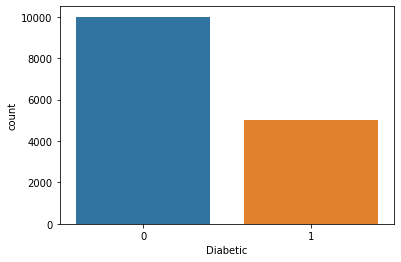

In [10]:
# Outcome countplot
sns.countplot(x = 'Diabetic',data = diabetes_data)

## Part 3: Data Preprocessing

### A. Feature Selection

In [11]:
#Feature Selection using Chi-square method

from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest

X = diabetes_data.iloc[:,0:8] 
y = diabetes_data.iloc[:,-1]   
imp_features = SelectKBest(score_func=chi2, k=8)
fit = imp_features.fit(X,y)
df_scores = pd.DataFrame(fit.scores_)
df_columns = pd.DataFrame(X.columns) 
attr_scores = pd.concat([df_columns,df_scores],axis=1)
attr_scores.columns = ['Features','Score']  
print(attr_scores.nlargest(8,'Score'))

                 Features          Score
4            SerumInsulin  117899.178047
0             Pregnancies    8873.960067
7                     Age    8538.278751
3        TricepsThickness    2565.049101
1           PlasmaGlucose    2330.615204
5                     BMI    2008.936371
2  DiastolicBloodPressure     493.109061
6        DiabetesPedigree     155.745810


In [12]:
#Feature Selection using Correlation Matrix
diabetes_data.corr()

,Pregnancies,PlasmaGlucose,DiastolicBloodPressure,TricepsThickness,SerumInsulin,BMI,DiabetesPedigree,Age,Diabetic
Pregnancies,1.000000,0.054502,0.043528,0.063605,0.104487,0.086386,0.054240,0.136972,0.407315
PlasmaGlucose,0.054502,1.000000,0.007212,0.027100,0.033545,0.020653,0.009057,0.038864,0.128004
DiastolicBloodPressure,0.043528,0.007212,1.000000,0.011106,0.022649,0.015873,0.014099,0.041333,0.091307
TricepsThickness,0.063605,0.027100,0.011106,1.000000,0.029688,0.024745,-0.000951,0.061383,0.152505
SerumInsulin,0.104487,0.033545,0.022649,0.029688,1.000000,0.051223,0.046324,0.088007,0.247375
BMI,0.086386,0.020653,0.015873,0.024745,0.051223,1.000000,0.028868,0.062910,0.210508
DiabetesPedigree,0.054240,0.009057,0.014099,-0.000951,0.046324,0.028868,1.000000,0.055633,0.170302
Age,0.136972,0.038864,0.041333,0.061383,0.088007,0.062910,0.055633,1.000000,0.342605
Diabetic,0.407315,0.128004,0.091307,0.152505,0.247375,0.210508,0.170302,0.342605,1.000000


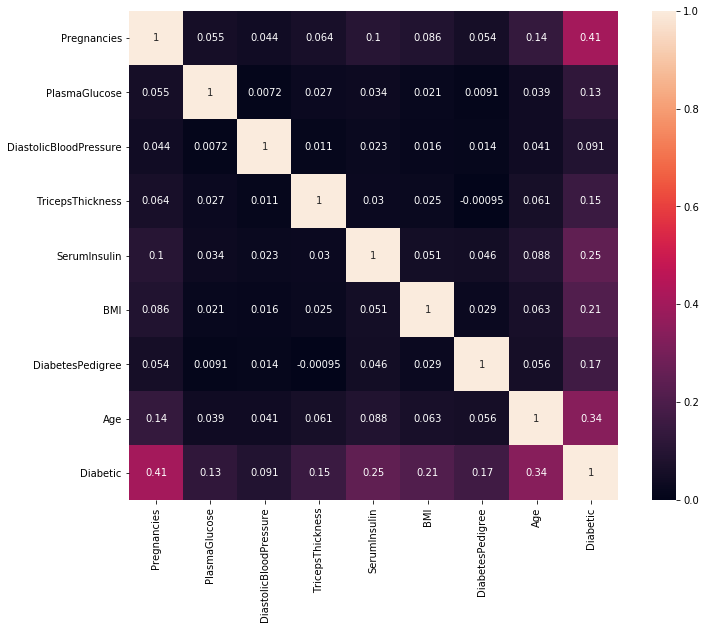

In [13]:
#Using Heatmap to visualize the correlation matrix

fig, ax = plt.subplots(figsize=(12, 9))
sns.heatmap(diabetes_data.corr(), vmax=1, annot=True,square=True);
plt.show()

[0.30549495 0.09638555 0.04904292 0.05668018 0.11885115 0.17215234
 0.04401984 0.15737307]


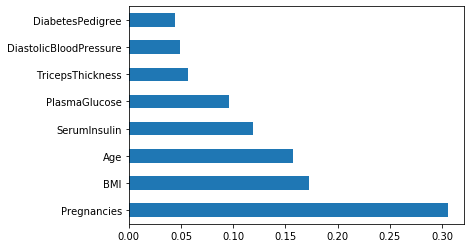

In [14]:
#Using RandomForest classifier for feature selection

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier()
model.fit(X,y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(8).plot(kind='barh')
plt.show()

In [15]:
# Feature scaling using MinMaxScaler
#from sklearn.preprocessing import MinMaxScaler
#scalar = MinMaxScaler(feature_range = (0, 1))
#data_scaled = scalar.fit_transform(data)

In [16]:
#data_scaled = pd.DataFrame(data_scaled)
#data_scaled

In [17]:
# Selecting features - [Preganancies,Glucose, Insulin, BMI, Age]
X = diabetes_data.iloc[:, [0, 1, 4, 5, 7]].values

#Labelled data
Y = diabetes_data.iloc[:, 8].values

### B. Feature Scaling using MinMaxScalar

In [18]:
# Feature scaling using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
scalar = MinMaxScaler(feature_range = (0, 1))
scalar.fit_transform(X,Y)

array([[0.        , 0.85810811, 0.01146497, 0.66895218, 0.        ],
       [0.57142857, 0.32432432, 0.02802548, 0.08035246, 0.03571429],
       [0.5       , 0.47972973, 0.02675159, 0.61613735, 0.03571429],
       ...,
       [0.        , 0.33108108, 0.05477707, 0.01295581, 0.05357143],
       [0.        , 0.59459459, 0.18726115, 0.04205552, 0.03571429],
       [0.21428571, 0.47297297, 0.6343949 , 0.47615557, 0.23214286]])

In [19]:
#Setting the seed value

seed = 5
np.random.seed(seed)

In [20]:
#Splitting the data into train data and test data
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.20, random_state = 42, stratify = diabetes_data['Diabetic'] )

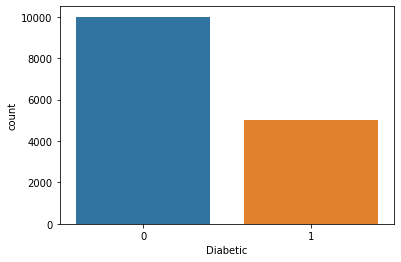

In [21]:
# Checking the count of 0 and 1 by plotting the countplot

sns.countplot(x = 'Diabetic',data = diabetes_data)

In [22]:
#Using the SMOTE library for balancing the outcome.

from imblearn.over_sampling import SMOTE

# transform the dataset
smote = SMOTE(random_state=2)
X_train_smote, y_train_smote = smote.fit_sample(X_train, Y_train)

In [23]:
#Before Oversampling - Checking the shape of data and count of outcome

print("The shape of X_train before oversampling = {}".format(X_train.shape))
print("The shape of Y_train before oversampling = {}".format(Y_train.shape))

print("The count of label 0 before oversampling = {}".format(sum(Y_train == 0)))
print("The count of label 1 before oversampling = {}".format(sum(Y_train == 1)))

#After Oversampling - Checking the shape of data and count of outcome
  
print("The shape of X_train_smote after oversampling = {}".format(X_train_smote.shape))
print("The shape of Y_train before oversampling = {}".format(y_train_smote.shape))

print("The count of label 0 before after oversampling = {}".format(sum(y_train_smote == 0)))
print("The count of label 1 before after oversampling = {}".format(sum(y_train_smote == 1)))

The shape of X_train before oversampling = (12000, 5)
The shape of Y_train before oversampling = (12000,)
The count of label 0 before oversampling = 8000
The count of label 1 before oversampling = 4000
The shape of X_train_smote after oversampling = (16000, 5)
The shape of Y_train before oversampling = (16000,)
The count of label 0 before after oversampling = 8000
The count of label 1 before after oversampling = 8000


## Part 4: Data Modelling and Model Evaluation

### 1.Logistic Regression

In [51]:
# Import LogisticRegression library
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

#Creating Model
logistic_model = LogisticRegression(random_state = 42)

#Defining Parameters
C = [0.001,0.01, 0.1, 1, 5, 10, 50, 100, 500, 1000, 50000, 100000] 
penalty = ['l2']

# Creating a dictionay of the grid search paramters 
param_grid = {'C':C,'penalty':penalty}

# Buidling the grid using GridSearchCV
grid=GridSearchCV(estimator=logistic_model, param_grid=param_grid, n_jobs=-1, cv=10,verbose=10, return_train_score=True)

#Fitting the grid
grid_search = grid.fit(X_train_smote,y_train_smote)

Fitting 10 folds for each of 24 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0125s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1316s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  19 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1895s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.4s
[Parallel(n_jobs=-1)]: Done 104 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done 200 out of 240 | elapsed:    1.5s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done 240 out of 240 | elapsed:    1.8s finished


In [52]:
# Summarizing the result - Best Accuracy 
print("Best Accuracy: {0}, using {1}".format(grid_search.best_score_, grid_search.best_params_))

Best Accuracy: 0.7610625, using {'C': 1, 'penalty': 'l2'}


In [53]:
# finding the mean train accuracy, mean test accuracy and standard deviation
means_train = grid_search.cv_results_['mean_train_score']
means_test = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean_train,mean_test, stdev, param in zip(means_train,means_test, stds, params):
    print('{0} {1} ({2}) with: {3}'.format(mean_train,mean_test, stdev, param))

nan nan (nan) with: {'C': 0.001, 'penalty': 'l1'}
0.7605763888888889 0.7610624999999999 (0.010043071305631545) with: {'C': 0.001, 'penalty': 'l2'}
nan nan (nan) with: {'C': 0.01, 'penalty': 'l1'}
0.7605138888888889 0.760875 (0.011068677653631424) with: {'C': 0.01, 'penalty': 'l2'}
nan nan (nan) with: {'C': 0.1, 'penalty': 'l1'}
0.7604722222222222 0.761 (0.011022703842524286) with: {'C': 0.1, 'penalty': 'l2'}
nan nan (nan) with: {'C': 1, 'penalty': 'l1'}
0.7604791666666667 0.7610625 (0.011064618441229676) with: {'C': 1, 'penalty': 'l2'}
nan nan (nan) with: {'C': 5, 'penalty': 'l1'}
0.7604791666666667 0.7610625 (0.011064618441229676) with: {'C': 5, 'penalty': 'l2'}
nan nan (nan) with: {'C': 10, 'penalty': 'l1'}
0.7604791666666667 0.7610625 (0.011064618441229676) with: {'C': 10, 'penalty': 'l2'}
nan nan (nan) with: {'C': 50, 'penalty': 'l1'}
0.7604861111111111 0.7610625 (0.011064618441229676) with: {'C': 50, 'penalty': 'l2'}
nan nan (nan) with: {'C': 100, 'penalty': 'l1'}
0.76048611111111

In [25]:
from sklearn.linear_model import LogisticRegression
#Creating Model
logistic_model = LogisticRegression(C=1, penalty='l2')

#Fitting the model
logistic_model.fit(X_train_smote, y_train_smote)

LogisticRegression(C=1)

In [26]:
#Calculating train accuracy

logistic_accuracy_train = accuracy_score(y_train_smote,logistic_model.predict(X_train_smote))
print("Training accuracy of Logistic Regression model is " + str(logistic_accuracy_train * 100))

Training accuracy of Logistic Regression model is 76.03125


In [27]:
# Making predictions on test dataset
Y_predict_logistic = logistic_model.predict(X_test)

# Calculating test accuracy
logistic_accuracy_test = accuracy_score(Y_test, Y_predict_logistic)
print("Test Accuracy of Logistic Regression model is " + str(logistic_accuracy_test * 100))

Test Accuracy of Logistic Regression model is 76.13333333333333


In [28]:
# Confusion matrix

confusion_matrix_logistic = confusion_matrix(Y_test, Y_predict_logistic)
confusion_matrix_logistic

array([[1525,  475],
       [ 241,  759]], dtype=int64)

In [29]:
# Classification Report

print(classification_report(Y_test, Y_predict_logistic))

              precision    recall  f1-score   support

           0       0.86      0.76      0.81      2000
           1       0.62      0.76      0.68      1000

    accuracy                           0.76      3000
   macro avg       0.74      0.76      0.74      3000
weighted avg       0.78      0.76      0.77      3000



### 2.SVM

In [25]:
# Importing libraries
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC

#Creating Model
svm_model = SVC(random_state = 42)

#Defining parametrs

C = [1, 5, 10, 50, 100, 500, 1000, 100000]
kernel = ['linear','rbf','poly']
degree = [1,2]

#Creating a dictionary of parameters
param_grid = {'C':C,'kernel':kernel,'degree':degree}

#Buidling the grid using GridSearchCV
grid=GridSearchCV(estimator=svm_model, param_grid=param_grid, cv=5, n_jobs=-1,verbose=10, return_train_score=True)

#Fitting the grid
grid_search = grid.fit(X_train_smote,y_train_smote)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed: 21.6min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 23.6min
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed: 26.6min
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed: 71.2min
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed: 72.9min
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed: 110.8min
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed: 148.0min
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed: 225.1min
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed: 254.2min
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed: 308.3min
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed: 362.1min
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed: 417.6min
[Parallel(n_jobs=-1)]: Done 184 tasks      | elap

In [26]:
# Summarizing the result - Best Accuracy 
print("Best Accuracy: {0}, using {1}".format(grid_search.best_score_, grid_search.best_params_))

Best Accuracy: 0.893, using {'C': 100000, 'degree': 1, 'kernel': 'rbf'}


In [27]:
# finding the mean train accuracy, mean test accuracy and standard deviation
means_train = grid_search.cv_results_['mean_train_score']
means_test = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean_train,mean_test, stdev, param in zip(means_train,means_test, stds, params):
    print('{0} {1} ({2}) with: {3}'.format(mean_train,mean_test, stdev, param))

0.760890625 0.7613749999999999 (0.004377677751959341) with: {'C': 1, 'degree': 1, 'kernel': 'linear'}
0.78559375 0.7846250000000001 (0.0017831678272108727) with: {'C': 1, 'degree': 1, 'kernel': 'rbf'}
0.757921875 0.7578750000000001 (0.003939979378118628) with: {'C': 1, 'degree': 1, 'kernel': 'poly'}
0.760890625 0.7613749999999999 (0.004377677751959341) with: {'C': 1, 'degree': 2, 'kernel': 'linear'}
0.78559375 0.7846250000000001 (0.0017831678272108727) with: {'C': 1, 'degree': 2, 'kernel': 'rbf'}
0.76815625 0.7670625 (0.003477606935810894) with: {'C': 1, 'degree': 2, 'kernel': 'poly'}
0.7634531250000001 0.7626875 (0.004120262430962375) with: {'C': 5, 'degree': 1, 'kernel': 'linear'}
0.8052343749999998 0.8043125 (0.003419841005076111) with: {'C': 5, 'degree': 1, 'kernel': 'rbf'}
0.759484375 0.7580625000000001 (0.0030834740958860267) with: {'C': 5, 'degree': 1, 'kernel': 'poly'}
0.7634531250000001 0.7626875 (0.004120262430962375) with: {'C': 5, 'degree': 2, 'kernel': 'linear'}
0.80523437

In [36]:
#Creating the model
from sklearn.svm import SVC
svm_model = SVC(C = 100000, kernel = 'rbf')

#Fitting the model
svm_model.fit(X_train_smote, y_train_smote)

SVC(C=100000)

In [37]:
#Calculating train accuracy

svm_accuracy_train = accuracy_score(y_train_smote,svm_model.predict(X_train_smote))
print("Training accuracy of SVM model is " + str(svm_accuracy_train * 100))

Training accuracy of SVM model is 90.08749999999999


In [38]:
#Making predictions on test data

Y_predict_svm = svm_model.predict(X_test)

#Calculating test accuracy
svm_accuracy_test = accuracy_score(Y_test, Y_predict_svm)
print("Test Accuracy of SVM Model is " + str(svm_accuracy_test * 100))

Test Accuracy of SVM Model is 88.63333333333333


In [39]:
# Confusion matrix

confusion_matrix_svm = confusion_matrix(Y_test, Y_predict_svm)
confusion_matrix_svm

array([[1784,  216],
       [ 125,  875]], dtype=int64)

In [40]:
# Classification report

print(classification_report(Y_test, Y_predict_svm))

              precision    recall  f1-score   support

           0       0.93      0.89      0.91      2000
           1       0.80      0.88      0.84      1000

    accuracy                           0.89      3000
   macro avg       0.87      0.88      0.87      3000
weighted avg       0.89      0.89      0.89      3000



### 3.KNN

In [60]:
# Importing libraries
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV, KFold

#Creating Model
knn = KNeighborsClassifier()

#Defining parametrs
metric = ['minkowski','euclidean'] 
n_neighbors = [1,3,5,7,9,11,13,15,17,19,21,23,25,27,29]

#Creating a dictionary of parameters
param_grid = {'metric':metric,'n_neighbors':n_neighbors}

#Buidling the grid using GridSearchCV
grid=GridSearchCV(estimator=knn, param_grid=param_grid, cv=10, n_jobs=-1,verbose=10, return_train_score=True)

#Fitting the grid
grid_search = grid.fit(X_train_smote,y_train_smote)

Fitting 10 folds for each of 30 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.7s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.5s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    6.1s
[Parallel(n_jobs=-1)]: Done  69 tasks      | elapsed:    7.9s
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:    9.7s
[Parallel(n_jobs=-1)]: Done  97 tasks      | elapsed:   11.5s
[Parallel(n_jobs=-1)]: Done 112 tasks      | elapsed:   13.1s
[Parallel(n_jobs=-1)]: Done 129 tasks      | elapsed:   15.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   18.0s
[Parallel(n_jobs=-1)]: Done 165 tasks      | elapsed:   20.0s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   

In [61]:
# Summarizing the result - Best Accuracy 
print("Best Accuracy: {0}, using {1}".format(grid_search.best_score_, grid_search.best_params_))

Best Accuracy: 0.9106875000000001, using {'metric': 'minkowski', 'n_neighbors': 1}


In [62]:
# finding the mean train accuracy, mean test accuracy and standard deviation
means_train = grid_search.cv_results_['mean_train_score']
means_test = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean_train,mean_test, stdev, param in zip(means_train,means_test, stds, params):
    print('{0} {1} ({2}) with: {3}'.format(mean_train,mean_test, stdev, param))

1.0 0.9106875000000001 (0.012867868170369173) with: {'metric': 'minkowski', 'n_neighbors': 1}
0.9419236111111111 0.8886249999999999 (0.01626393633165108) with: {'metric': 'minkowski', 'n_neighbors': 3}
0.9186041666666667 0.8793124999999999 (0.015238853508384402) with: {'metric': 'minkowski', 'n_neighbors': 5}
0.904701388888889 0.873875 (0.017143238463020943) with: {'metric': 'minkowski', 'n_neighbors': 7}
0.8955694444444443 0.869375 (0.018260271082325145) with: {'metric': 'minkowski', 'n_neighbors': 9}
0.8874305555555555 0.8645624999999999 (0.01652424828093551) with: {'metric': 'minkowski', 'n_neighbors': 11}
0.8817083333333333 0.8621875000000001 (0.015932597285125864) with: {'metric': 'minkowski', 'n_neighbors': 13}
0.8763888888888889 0.8596875 (0.01634407862958323) with: {'metric': 'minkowski', 'n_neighbors': 15}
0.8721249999999999 0.8571249999999999 (0.01519200036203265) with: {'metric': 'minkowski', 'n_neighbors': 17}
0.8677222222222222 0.8533125 (0.014042485757514586) with: {'metr

In [44]:
from sklearn.neighbors import KNeighborsClassifier

#Creating a model
knn = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski')

#Fitting a model
knn.fit(X_train_smote, y_train_smote)

KNeighborsClassifier(n_neighbors=1)

In [45]:
#Calculating train accuracy

knn_accuracy_train = accuracy_score(y_train_smote,knn.predict(X_train_smote))
print("Training accuracy of KNN Model is: " + str(knn_accuracy_train * 100))

Training accuracy of KNN Model is: 100.0


In [46]:
#Making predictions on test data
Y_pred_knn = knn.predict(X_test)

#Calculating test accuracy
knn_accuracy_test = accuracy_score(Y_test, Y_pred_knn)
print("Testing accuracy of KNN Model is: " + str(knn_accuracy_test * 100))

Testing accuracy of KNN Model is: 84.36666666666667


In [47]:
# Confusion matrix
confusion_matrix_knn = confusion_matrix(Y_test, Y_pred_knn)
confusion_matrix_knn

array([[1745,  255],
       [ 214,  786]], dtype=int64)

In [48]:
# Classification report
print(classification_report(Y_test, Y_pred_knn))

              precision    recall  f1-score   support

           0       0.89      0.87      0.88      2000
           1       0.76      0.79      0.77      1000

    accuracy                           0.84      3000
   macro avg       0.82      0.83      0.83      3000
weighted avg       0.85      0.84      0.84      3000



### 4.Decision Tree

In [69]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state = 42)

criterion = ['entropy','gini']
max_depth = [2,6,12,20,50,100,200,300,500]
min_samples_split = [2, 3, 4, 5,6]
max_features = [1, 2, 3, 4, 5]

param_grid = {'criterion':criterion,'max_depth':max_depth, 'min_samples_split':min_samples_split,'max_features':max_features }

grid=GridSearchCV(estimator=decision_tree, param_grid=param_grid, cv=10, n_jobs=-1,verbose=10, return_train_score=True)

grid_search = grid.fit(X_train_smote,y_train_smote)

Fitting 10 folds for each of 450 candidates, totalling 4500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    1.9s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1844s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Done  45 tasks      | elapsed:    2.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0608s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  64 tasks      | elapsed:    2.1s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0947s.) Setting batch_size=8.
[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:    2.2s
[Parallel(n_jobs=-1)]: Done 160 tasks      | elapsed:    2.4s
[Parallel(n_jobs=-1)]: Done 280 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 400 tasks      | elapsed:  

In [70]:
print("Best Accuracy: {0}, using {1}".format(grid_search.best_score_, grid_search.best_params_))

Best Accuracy: 0.9280624999999999, using {'criterion': 'entropy', 'max_depth': 12, 'max_features': 5, 'min_samples_split': 3}


In [71]:
# finding the mean train accuracy, mean test accuracy and standard deviation
means_train = grid_search.cv_results_['mean_train_score']
means_test = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean_train,mean_test, stdev, param in zip(means_train,means_test, stds, params):
    print('{0} {1} ({2}) with: {3}'.format(mean_train,mean_test, stdev, param))

0.7218125000000001 0.7216875 (0.012540714941740784) with: {'criterion': 'entropy', 'max_depth': 2, 'max_features': 1, 'min_samples_split': 2}
0.7218125000000001 0.7216875 (0.012540714941740784) with: {'criterion': 'entropy', 'max_depth': 2, 'max_features': 1, 'min_samples_split': 3}
0.7218125000000001 0.7216875 (0.012540714941740784) with: {'criterion': 'entropy', 'max_depth': 2, 'max_features': 1, 'min_samples_split': 4}
0.7218125000000001 0.7216875 (0.012540714941740784) with: {'criterion': 'entropy', 'max_depth': 2, 'max_features': 1, 'min_samples_split': 5}
0.7218125000000001 0.7216875 (0.012540714941740784) with: {'criterion': 'entropy', 'max_depth': 2, 'max_features': 1, 'min_samples_split': 6}
0.8783750000000001 0.8783125 (0.01549205945799332) with: {'criterion': 'entropy', 'max_depth': 2, 'max_features': 2, 'min_samples_split': 2}
0.8783750000000001 0.8783125 (0.01549205945799332) with: {'criterion': 'entropy', 'max_depth': 2, 'max_features': 2, 'min_samples_split': 3}
0.878375

In [52]:
from sklearn.tree import DecisionTreeClassifier

#Creating the model
decision_tree = DecisionTreeClassifier(criterion = 'entropy', max_depth = 12, max_features = 5, min_samples_split = 5)

#Fitting the model
decision_tree.fit(X_train_smote, y_train_smote)

DecisionTreeClassifier(criterion='entropy', max_depth=12, max_features=5,
                       min_samples_split=5)

In [53]:
#Calculating train accuracy

decision_tree_accuracy_train = accuracy_score(y_train_smote,decision_tree.predict(X_train_smote))
print("Training accuracy of Decision Tree model is " + str(decision_tree_accuracy_train * 100))

Training accuracy of Decision Tree model is 97.04374999999999


In [54]:
#Making predictions on test data
Y_predict_decision_tree = decision_tree.predict(X_test)

#Calculating test accuracy
decision_tree_accuracy_test = accuracy_score(Y_test, Y_predict_decision_tree)
print("Testing accuracy of Decision Tree Model is: " + str(decision_tree_accuracy_test * 100))

Testing accuracy of Decision Tree Model is: 90.66666666666666


In [55]:
# Confusion matrix
confusion_matrix_decision_tree = confusion_matrix(Y_test, Y_predict_decision_tree)
confusion_matrix_decision_tree

array([[1838,  162],
       [ 118,  882]], dtype=int64)

In [56]:
# Classification report
print(classification_report(Y_test, Y_predict_decision_tree))

              precision    recall  f1-score   support

           0       0.94      0.92      0.93      2000
           1       0.84      0.88      0.86      1000

    accuracy                           0.91      3000
   macro avg       0.89      0.90      0.90      3000
weighted avg       0.91      0.91      0.91      3000



In [57]:
print(precision_score(Y_test, Y_predict_decision_tree))

0.8448275862068966


In [58]:
print(recall_score(Y_test, Y_predict_decision_tree))

0.882


In [59]:
print(f1_score(Y_test, Y_predict_decision_tree))

0.8630136986301371


### 5. Random Forest

In [78]:
# Importing RandonForestClassifer 
from sklearn.ensemble import RandomForestClassifier

#Creating a model
randomfor = RandomForestClassifier(random_state = 42)

n_estimators = [1,3,5,7,9,11,13,15,17,19,21,23]
max_depth = [2,6,12,20,50,100,200,300,500]
max_features = ['auto','log2','sqrt']

criterion = ['gini', 'entropy']
            
param_grid = {'n_estimators':n_estimators,'max_depth':max_depth, 'max_features':max_features,'criterion':criterion }

grid=GridSearchCV(estimator=randomfor, param_grid=param_grid, cv=10, n_jobs=-1,verbose=10, return_train_score=True)

grid_search = grid.fit(X_train_smote,y_train_smote)

Fitting 10 folds for each of 648 candidates, totalling 6480 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0468s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-1)]: Batch computation too fast (0.1147s.) Setting batch_size=4.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    0.6s
[Parallel(n_jobs=-1)]: Done 100 tasks      | elapsed:    1.4s
[Parallel(n_jobs=-1)]: Done 144 tasks      | elapsed:    1.8s
[Parallel(n_jobs=-1)]: Done 196 tasks      | elapsed:    2.6s
[Parallel(n_jobs=-1)]: Done 248 tasks      | elapsed:    3.3s
[Parallel(n_jobs=-1)]: Done 308 tasks      | elapsed:    4.1s
[Parallel(n_jobs=-1)]: Done 368 tasks      | elapsed:    5.2s
[Parallel(n_jobs=-1)]: Done 436 tasks      | elapsed:    7.0s
[Parallel(n_jo

In [79]:
print("Best Accuracy: {0}, using {1}".format(grid_search.best_score_, grid_search.best_params_))

Best Accuracy: 0.9454374999999999, using {'criterion': 'entropy', 'max_depth': 50, 'max_features': 'auto', 'n_estimators': 23}


In [80]:
# finding the mean train accuracy, mean test accuracy and standard deviation
means_train = grid_search.cv_results_['mean_train_score']
means_test = grid_search.cv_results_['mean_test_score']
stds = grid_search.cv_results_['std_test_score']
params = grid_search.cv_results_['params']
for mean_train,mean_test, stdev, param in zip(means_train,means_test, stds, params):
    print('{0} {1} ({2}) with: {3}'.format(mean_train,mean_test, stdev, param))

0.8524652777777778 0.8516875 (0.01530178196322246) with: {'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto', 'n_estimators': 1}
0.8760000000000001 0.8754375 (0.01604936233156943) with: {'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto', 'n_estimators': 3}
0.8710277777777777 0.86875 (0.011726039399558585) with: {'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto', 'n_estimators': 5}
0.867576388888889 0.8673125 (0.013764339114174727) with: {'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto', 'n_estimators': 7}
0.8675416666666667 0.8674375 (0.013816458708728526) with: {'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto', 'n_estimators': 9}
0.8675902777777779 0.8675625 (0.013697199759439897) with: {'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto', 'n_estimators': 11}
0.8676944444444444 0.86775 (0.013787449002625551) with: {'criterion': 'gini', 'max_depth': 2, 'max_features': 'auto', 'n_estimators': 13}
0.8676388888888888 0.8664375 (0.

In [60]:
from sklearn.ensemble import RandomForestClassifier
#Creating a model
randomfor = RandomForestClassifier(criterion = 'entropy', n_estimators = 23, max_depth = 50, max_features = 'auto')

#Fitting a model
randomfor.fit(X_train_smote, y_train_smote)

RandomForestClassifier(criterion='entropy', max_depth=50, n_estimators=23)

In [61]:
#Calculating train accuracy

randomfor_accuracy_train = accuracy_score(y_train_smote,randomfor.predict(X_train_smote))
print("Training accuracy of Random Forest Model is: " + str(randomfor_accuracy_train * 100))

Training accuracy of Random Forest Model is: 99.88125


In [62]:
#Making predictions on test data
Y_pred_randomfor = randomfor.predict(X_test)

#Calculating train accuracy
randomfor_accuracy_test = accuracy_score(Y_test, Y_pred_randomfor)
print("Testing accuracy of Random Forest Model is: " + str(randomfor_accuracy_test * 100))

Testing accuracy of Random Forest Model is: 92.7


In [63]:
# Confusion matrix

confusion_matrix_randomfor = confusion_matrix(Y_test, Y_pred_randomfor)
confusion_matrix_randomfor

array([[1881,  119],
       [ 100,  900]], dtype=int64)

In [64]:
# Classification report

print(classification_report(Y_test, Y_pred_randomfor))

              precision    recall  f1-score   support

           0       0.95      0.94      0.94      2000
           1       0.88      0.90      0.89      1000

    accuracy                           0.93      3000
   macro avg       0.92      0.92      0.92      3000
weighted avg       0.93      0.93      0.93      3000

